<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2021-11-14 13:00:00 (Sunday)</font></h2>
<h3 align="center"><font size="5">Total marks: 2.0</font></h3>

### Your information:
- Fullname: Đinh Viết Trung
- Date of birth: 02/06/1999
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we have learned in this course (LDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of car"** by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import iqr
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%load_ext nb_black

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Data exploration and visualization

In [2]:
"""
Quan sát cấu trúc dữ liệu file imports_85.csv, ta thấy data này chưa có column name (dòng 1 đã là các values)
=> ta read file và thêm tên cột cho nó theo mô tả của Attribute Information

"""

'\nQuan sát cấu trúc dữ liệu file imports_85.csv, ta thấy data này chưa có column name (dòng 1 đã là các values)\n=> ta read file và thêm tên cột cho nó theo mô tả của Attribute Information\n\n'

<IPython.core.display.Javascript object>

In [3]:
lst_col_names = [
        "symboling",
        "normalized-losses",
        "make",
        "fuel-type",
        "aspiration",
        "num-of-doors",
        "body-style",
        "drive-wheels",
        "engine-location",
        "wheel-base",
        "length",
        "width",
        "height",
        "curb-weight",
        "engine-type",
        "num-of-cylinders",
        "engine-size",
        "fuel-system",
        "bore",
        "stroke",
        "compression-ratio",
        "horsepower",
        "peak-rpm",
        "city-mpg",
        "highway-mpg",
        "price"]
    


<IPython.core.display.Javascript object>

In [4]:
# read data from csv
df = pd.read_csv("imports_85.csv", names=lst_col_names)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<IPython.core.display.Javascript object>

In [6]:
"""
Quan sát cấu trúc dữ liệu, ta thấy data tồn tại nhiều vấn đề như:
    - Có chứa các giá trị '?' 
"""

"\nQuan sát cấu trúc dữ liệu, ta thấy data tồn tại nhiều vấn đề như:\n    - Có chứa các giá trị '?' \n"

<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<IPython.core.display.Javascript object>

In [8]:
# đổi '?' thành NaN để dễ dàng xử lý NaN với các hàm có sẵn (fillna, ...)
df = df.replace("?", np.NaN)

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<IPython.core.display.Javascript object>

In [10]:
"""
đã xuất hiện các giá trị NaN trong df do ta replace '?' thành NaN để dễ xử lý với các hàm có sẵn
"""

"\nđã xuất hiện các giá trị NaN trong df do ta replace '?' thành NaN để dễ xử lý với các hàm có sẵn\n"

<IPython.core.display.Javascript object>

In [11]:
# chuyển tất cả các type của columns sang kiểu numeric (nếu có thể)
df = df.apply(pd.to_numeric, errors="ignore")

<IPython.core.display.Javascript object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<IPython.core.display.Javascript object>

### Xác định các thuộc tính

In [13]:
"""
Xác định thuộc tính từ requirements
input: <> price: tất cả các thuộc tính trừ price
output: price

variable type:
    - predictor: <> price: các thuộc tính khác price
    - target: price
data type:
    - object (char/string)
    - numeric

"""

'\nXác định thuộc tính từ requirements\ninput: <> price: tất cả các thuộc tính trừ price\noutput: price\n\nvariable type:\n    - predictor: <> price: các thuộc tính khác price\n    - target: price\ndata type:\n    - object (char/string)\n    - numeric\n\n'

<IPython.core.display.Javascript object>

In [14]:
# df_predict = df.drop(columns="price")
# df_predict.columns

<IPython.core.display.Javascript object>

In [15]:
# quantitative (định lượng)

# i là field
numbers = [i for i in df.columns if df.dtypes[i] != "object"]
numbers

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

<IPython.core.display.Javascript object>

In [16]:
# qualitative (định tính)
objects = [i for i in df.columns if df.dtypes[i] == "object"]  # i là field

objects

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

<IPython.core.display.Javascript object>

In [17]:
### xét các biến có dtype là object
i = 0
for obj in objects:
    print(i, "/", obj, "\t len=", len(df[obj].unique()), ":", df[obj].unique())
    i = i + 1

0 / make 	 len= 22 : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
1 / fuel-type 	 len= 2 : ['gas' 'diesel']
2 / aspiration 	 len= 2 : ['std' 'turbo']
3 / num-of-doors 	 len= 3 : ['two' 'four' nan]
4 / body-style 	 len= 5 : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
5 / drive-wheels 	 len= 3 : ['rwd' 'fwd' '4wd']
6 / engine-location 	 len= 2 : ['front' 'rear']
7 / engine-type 	 len= 7 : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
8 / num-of-cylinders 	 len= 7 : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
9 / fuel-system 	 len= 8 : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


<IPython.core.display.Javascript object>

In [18]:
### xét các biến có dtype != object
i = 0
for obj in numbers:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        ":",
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1

0 / symboling 	 len = 6 : [ 3  1  2  0 -1 -2]
1 / normalized-losses 	 len = 52 : 
2 / wheel-base 	 len = 53 : 
3 / length 	 len = 75 : 
4 / width 	 len = 44 : 
5 / height 	 len = 49 : 
6 / curb-weight 	 len = 171 : 
7 / engine-size 	 len = 44 : 
8 / bore 	 len = 39 : 
9 / stroke 	 len = 37 : 
10 / compression-ratio 	 len = 32 : 
11 / horsepower 	 len = 60 : 
12 / peak-rpm 	 len = 24 : 
13 / city-mpg 	 len = 29 : 
14 / highway-mpg 	 len = 30 : 
15 / price 	 len = 187 : 


<IPython.core.display.Javascript object>

In [19]:
", ".join(objects)

'make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system'

<IPython.core.display.Javascript object>

In [20]:
"""
Quan sát Atribute Information và các kết quả trên, ta thấy:
"""

'\nQuan sát Atribute Information và các kết quả trên, ta thấy:\n'

<IPython.core.display.Javascript object>

In [21]:
"""
Categorical variables: 
    make, 
    fuel-type, 
    aspiration, 
    num-of-doors, 
    body-style, 
    drive-wheels, 
    engine-location, 
    engine-type, 
    num-of-cylinders, 
    fuel-system,
    symboling
"""

'\nCategorical variables: \n    make, \n    fuel-type, \n    aspiration, \n    num-of-doors, \n    body-style, \n    drive-wheels, \n    engine-location, \n    engine-type, \n    num-of-cylinders, \n    fuel-system,\n    symboling\n'

<IPython.core.display.Javascript object>

In [22]:
"""
Các continuous variables: 
    normalized-losses, 
    wheel-base, 
    length, 
    width, 
    height, 
    curb-weight, 
    engine-size, 
    bore, 
    stroke, 
    compression-ratio, 
    horsepower, 
    peak-rpm, 
    city-mpg, 
    highway-mpg 
    
    price (target)

"""

'\nCác continuous variables: \n    normalized-losses, \n    wheel-base, \n    length, \n    width, \n    height, \n    curb-weight, \n    engine-size, \n    bore, \n    stroke, \n    compression-ratio, \n    horsepower, \n    peak-rpm, \n    city-mpg, \n    highway-mpg \n    \n    price (target)\n\n'

<IPython.core.display.Javascript object>

### Phân tích đơn biến

### Continuous variable

In [23]:
def continuous_univariate_analysis(f):
    print("1\ Describe: \n", f.describe(), "\n")
    print("2\ Meadian: ", f.median())
    print("3\ Mode: ", f.mode)
    print("4\ Range: ", f.values.ptp())
    print("5\ Variance: ", f.var())
    print("6\ Số NaN: ", f.isnull().sum())
    print("7\ \tQ1 = ", np.quantile(f, 0.25))
    print("   \tQ3 = ", np.quantile(f, 0.75))
    print("   \tIQR = ", iqr(f))

    print("8\ Skew: ", f.skew())
    if f.skew() > 0:
        print("Phân phối lệch phải")
    elif f.skew() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối lệch trái")

    print("9\ Kurtosis: ", f.kurtosis())
    if f.kurtosis() > 0:
        print("Phân phối nhọn hơn pp chuẩn")
    elif f.kurtosis() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối bẹt hơn pp chuẩn")

<IPython.core.display.Javascript object>

In [24]:
def visualize_histogram(f):
    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(f)

    plt.subplot(1, 2, 2)
    plt.hist(f)
    plt.show()

<IPython.core.display.Javascript object>

In [25]:
def visualize_boxplot(f):
    plt.boxplot(f)
    plt.show()

<IPython.core.display.Javascript object>

In [26]:
def find_outliers(f):
    Q1 = np.quantile(f, 0.25)
    Q3 = np.quantile(f, 0.75)
    IQR = Q3 - Q1
    
    # số lượng outliers
    num_outliers = len(f[(f > Q3 + 1.5 * IQR) | (f < Q1 - 1.5 * IQR)])
    
    # tỉ lệ outliers so với mẫu
    ratio = (num_outliers / f.shape[0])
                       
    print('Số lượng outliers: ', num_outliers)
    print('Tỉ lệ outliers so với mẫu', ratio)


<IPython.core.display.Javascript object>

### normalized-losses

1\ Describe: 
 count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64 

2\ Meadian:  115.0
3\ Mode:  <bound method Series.mode of 0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64>
4\ Range:  nan
5\ Variance:  1256.1472392638036
6\ Số NaN:  41
7\ 	Q1 =  nan
   	Q3 =  nan
   	IQR =  nan
8\ Skew:  0.7659764175950632
Phân phối lệch phải
9\ Kurtosis:  0.525440385629738
Phân phối nhọn hơn pp chuẩn


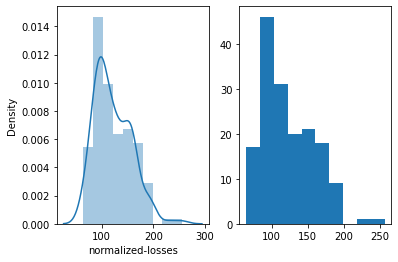

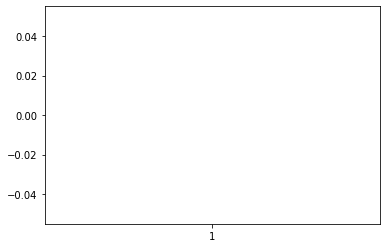

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [28]:
continuous_univariate_analysis(df["normalized-losses"])
visualize_histogram(df["normalized-losses"])
visualize_boxplot(df["normalized-losses"])
find_outliers(df["normalized-losses"])

In [29]:
"""
normalized-losses có 41 NaN nên ta thử thay NaN bằng median để xem kết quả outliers
"""

'\nnormalized-losses có 41 NaN nên ta thử thay NaN bằng median để xem kết quả outliers\n'

<IPython.core.display.Javascript object>

### normalized-losses fillna(mean)

1\ Describe: 
 count    205.000000
mean     122.000000
std       31.681008
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: normalized-losses, dtype: float64 

2\ Meadian:  122.0
3\ Mode:  <bound method Series.mode of 0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64>
4\ Range:  191.0
5\ Variance:  1003.6862745098039
6\ Số NaN:  0
7\ 	Q1 =  101.0
   	Q3 =  137.0
   	IQR =  36.0
8\ Skew:  0.8548022766908568
Phân phối lệch phải
9\ Kurtosis:  1.404644408345638
Phân phối nhọn hơn pp chuẩn


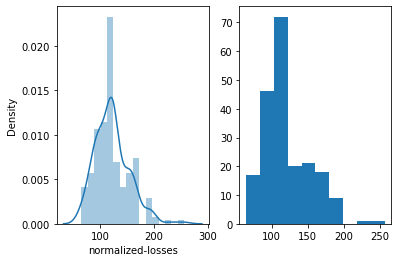

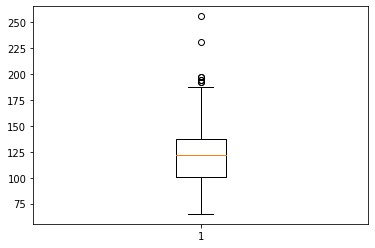

Số lượng outliers:  8
Tỉ lệ outliers so với mẫu 0.03902439024390244


<IPython.core.display.Javascript object>

In [31]:
m = df["normalized-losses"].mean()
df["normalized-losses"].fillna(m, inplace=True)

continuous_univariate_analysis(df["normalized-losses"].fillna(m))
visualize_histogram(df["normalized-losses"].fillna(m))
visualize_boxplot(df["normalized-losses"].fillna(m))
find_outliers(df["normalized-losses"].fillna(m))

In [32]:
"""

"""


'\n\n'

<IPython.core.display.Javascript object>

### wheel-base

1\ Describe: 
 count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64 

2\ Meadian:  97.0
3\ Mode:  <bound method Series.mode of 0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64>
4\ Range:  34.30000000000001
5\ Variance:  36.261782400765185
6\ Số NaN:  0
7\ 	Q1 =  94.5
   	Q3 =  102.4
   	IQR =  7.900000000000006
8\ Skew:  1.0502137758714858
Phân phối lệch phải
9\ Kurtosis:  1.0170389463774234
Phân phối nhọn hơn pp chuẩn


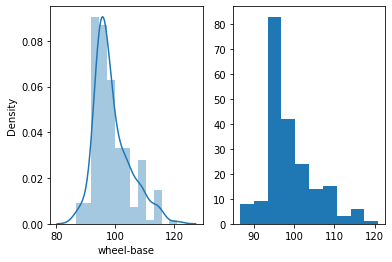

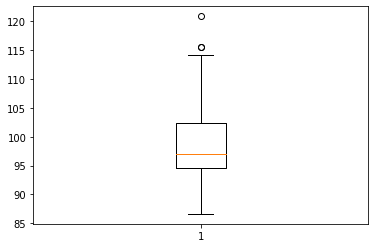

Số lượng outliers:  3
Tỉ lệ outliers so với mẫu 0.014634146341463415


<IPython.core.display.Javascript object>

In [34]:
# wheel-base
continuous_univariate_analysis(df["wheel-base"])
visualize_histogram(df["wheel-base"])
visualize_boxplot(df["wheel-base"])
find_outliers(df["wheel-base"])

In [35]:
"""
wheel-base ko có giá trị NaN

"""

'\nwheel-base ko có giá trị NaN\n\n'

<IPython.core.display.Javascript object>

### length

1\ Describe: 
 count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64 

2\ Meadian:  173.2
3\ Mode:  <bound method Series.mode of 0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64>
4\ Range:  67.0
5\ Variance:  152.2086881874701
6\ Số NaN:  0
7\ 	Q1 =  166.3
   	Q3 =  183.1
   	IQR =  16.799999999999983
8\ Skew:  0.1559537713215604
Phân phối lệch phải
9\ Kurtosis:  -0.08289485344758996
Phân phối bẹt hơn pp chuẩn


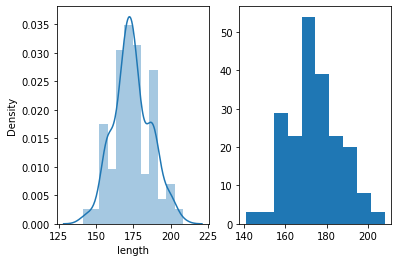

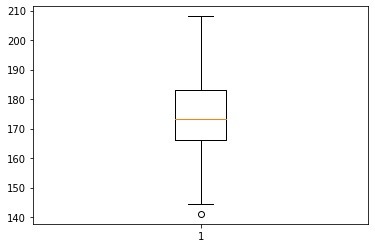

Số lượng outliers:  1
Tỉ lệ outliers so với mẫu 0.004878048780487805


<IPython.core.display.Javascript object>

In [36]:
# length
continuous_univariate_analysis(df["length"])
visualize_histogram(df["length"])
visualize_boxplot(df["length"])
find_outliers(df["length"])

In [37]:
"""
length ko có NaN

"""

'\nlength ko có NaN\n\n'

<IPython.core.display.Javascript object>

### width

1\ Describe: 
 count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64 

2\ Meadian:  65.5
3\ Mode:  <bound method Series.mode of 0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: width, Length: 205, dtype: float64>
4\ Range:  12.0
5\ Variance:  4.601899569583934
6\ Số NaN:  0
7\ 	Q1 =  64.1
   	Q3 =  66.9
   	IQR =  2.8000000000000114
8\ Skew:  0.904003498786254
Phân phối lệch phải
9\ Kurtosis:  0.7027642441369477
Phân phối nhọn hơn pp chuẩn


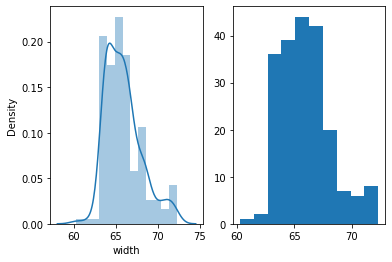

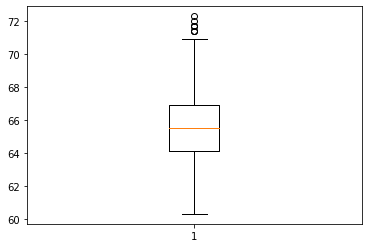

Số lượng outliers:  8
Tỉ lệ outliers so với mẫu 0.03902439024390244


<IPython.core.display.Javascript object>

In [38]:
# width
continuous_univariate_analysis(df["width"])
visualize_histogram(df["width"])
visualize_boxplot(df["width"])
find_outliers(df["width"])

In [40]:
"""
width ko có NaN
"""

'\nwidth ko có NaN\n'

<IPython.core.display.Javascript object>

### height

1\ Describe: 
 count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64 

2\ Meadian:  54.1
3\ Mode:  <bound method Series.mode of 0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 205, dtype: float64>
4\ Range:  12.0
5\ Variance:  5.97079961740794
6\ Số NaN:  0
7\ 	Q1 =  52.0
   	Q3 =  55.5
   	IQR =  3.5
8\ Skew:  0.06312273247192804
Phân phối lệch phải
9\ Kurtosis:  -0.4438123650575503
Phân phối bẹt hơn pp chuẩn


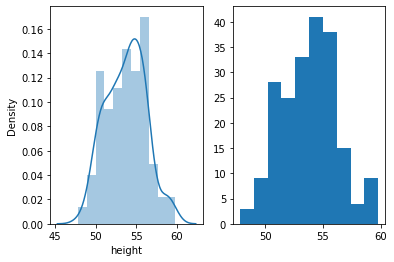

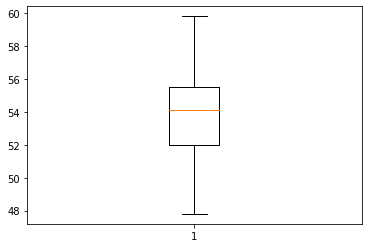

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [41]:
# height
continuous_univariate_analysis(df["height"])
visualize_histogram(df["height"])
visualize_boxplot(df["height"])
find_outliers(df["height"])

In [42]:
"""
height ko có NaN, ko có outliers
"""

'\nheight ko có NaN, ko có outliers\n'

<IPython.core.display.Javascript object>

### curb-weight

1\ Describe: 
 count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weight, dtype: float64 

2\ Meadian:  2414.0
3\ Mode:  <bound method Series.mode of 0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: int64>
4\ Range:  2578
5\ Variance:  271107.8743185079
6\ Số NaN:  0
7\ 	Q1 =  2145.0
   	Q3 =  2935.0
   	IQR =  790.0
8\ Skew:  0.681398189052588
Phân phối lệch phải
9\ Kurtosis:  -0.04285376609990976
Phân phối bẹt hơn pp chuẩn


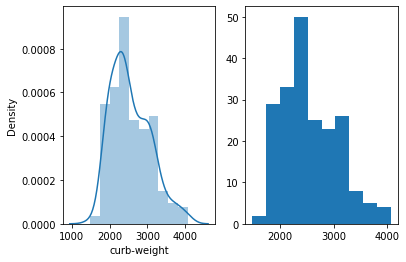

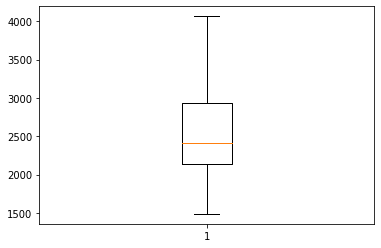

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [43]:
# curb-weight
continuous_univariate_analysis(df["curb-weight"])
visualize_histogram(df["curb-weight"])
visualize_boxplot(df["curb-weight"])
find_outliers(df["curb-weight"])

In [44]:
"""
curb-weight ko có NaN, ko có outliers
"""

'\ncurb-weight ko có NaN, ko có outliers\n'

<IPython.core.display.Javascript object>

### engine-size

1\ Describe: 
 count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64 

2\ Meadian:  120.0
3\ Mode:  <bound method Series.mode of 0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 205, dtype: int64>
4\ Range:  265
5\ Variance:  1734.1139167862266
6\ Số NaN:  0
7\ 	Q1 =  97.0
   	Q3 =  141.0
   	IQR =  44.0
8\ Skew:  1.9476550452788108
Phân phối lệch phải
9\ Kurtosis:  5.305682091703767
Phân phối nhọn hơn pp chuẩn


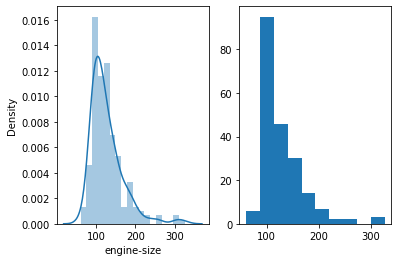

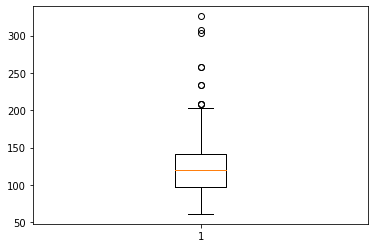

Số lượng outliers:  10
Tỉ lệ outliers so với mẫu 0.04878048780487805


<IPython.core.display.Javascript object>

In [45]:
# engine-size
continuous_univariate_analysis(df["engine-size"])
visualize_histogram(df["engine-size"])
visualize_boxplot(df["engine-size"])
find_outliers(df["engine-size"])

In [46]:
"""
engine-size ko có NaN
"""

'\nengine-size ko có NaN\n'

<IPython.core.display.Javascript object>

### bore

1\ Describe: 
 count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64 

2\ Meadian:  3.31
3\ Mode:  <bound method Series.mode of 0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64>
4\ Range:  nan
5\ Variance:  0.07482343781094528
6\ Số NaN:  4
7\ 	Q1 =  nan
   	Q3 =  nan
   	IQR =  nan
8\ Skew:  0.020015510309870796
Phân phối lệch phải
9\ Kurtosis:  -0.8289454004870165
Phân phối bẹt hơn pp chuẩn


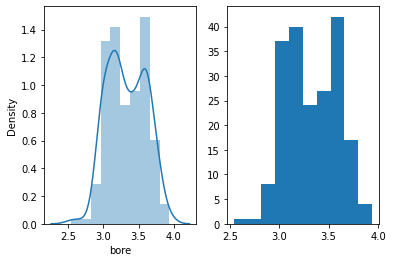

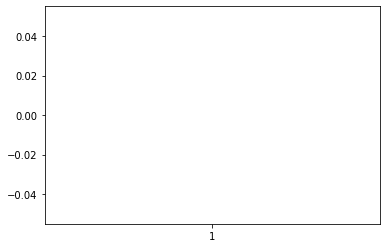

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [47]:
# bore
continuous_univariate_analysis(df["bore"])
visualize_histogram(df["bore"])
visualize_boxplot(df["bore"])
find_outliers(df["bore"])

In [48]:
"""
bore có NaN nên ko thể tính dc outliers, ta thử thay bằng giá trị mean để xem thử outlier của nó
"""

'\nbore có NaN nên ko thể tính dc outliers, ta thử thay bằng giá trị mean để xem thử outlier của nó\n'

<IPython.core.display.Javascript object>

1\ Describe: 
 count    205.000000
mean       3.329751
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: bore, dtype: float64 

2\ Meadian:  3.31
3\ Mode:  <bound method Series.mode of 0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64>
4\ Range:  1.4
5\ Variance:  0.07335631157935811
6\ Số NaN:  0
7\ 	Q1 =  3.15
   	Q3 =  3.58
   	IQR =  0.43000000000000016
8\ Skew:  0.02021071115159105
Phân phối lệch phải
9\ Kurtosis:  -0.7850402844106923
Phân phối bẹt hơn pp chuẩn


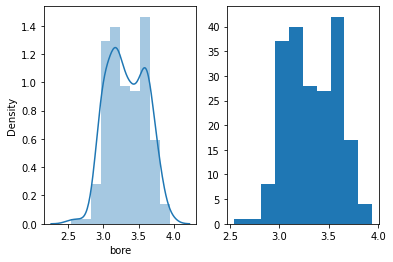

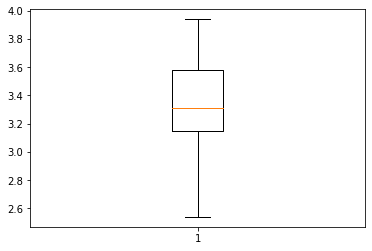

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [52]:
# bore
m2 = df["bore"].mean()
df["bore"].fillna(m2, inplace=True)

continuous_univariate_analysis(df["bore"])
visualize_histogram(df["bore"])
visualize_boxplot(df["bore"])
find_outliers(df["bore"])

1\ Describe: 
 count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64 

2\ Meadian:  3.29
3\ Mode:  <bound method Series.mode of 0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64>
4\ Range:  nan
5\ Variance:  0.10030994527363188
6\ Số NaN:  4
7\ 	Q1 =  nan
   	Q3 =  nan
   	IQR =  nan
8\ Skew:  -0.6831221940577341
Phân phối lệch trái
9\ Kurtosis:  2.0742434681742274
Phân phối nhọn hơn pp chuẩn


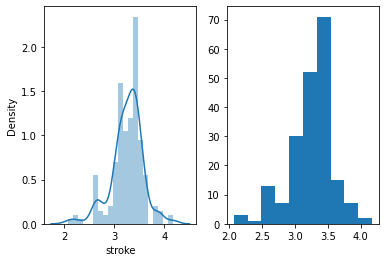

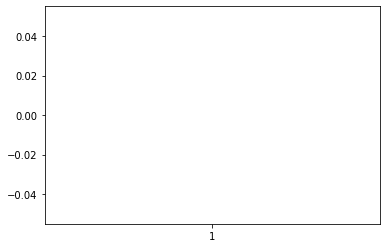

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [53]:
# stroke
continuous_univariate_analysis(df["stroke"])
visualize_histogram(df["stroke"])
visualize_boxplot(df["stroke"])
find_outliers(df["stroke"])

In [104]:
"""
vì stroke có NaN nên ko thể xem dc outliers
ta thử thay bằng mean để xem outliers
"""

'\nvì stroke có NaN nên ko thể xem dc outliers\nta thử thay bằng mean để xem outliers\n'

<IPython.core.display.Javascript object>

1\ Describe: 
 count    205.000000
mean       3.255423
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64 

2\ Meadian:  3.29
3\ Mode:  <bound method Series.mode of 0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64>
4\ Range:  2.1
5\ Variance:  0.09834308360159986
6\ Số NaN:  0
7\ 	Q1 =  3.11
   	Q3 =  3.41
   	IQR =  0.30000000000000027
8\ Skew:  -0.6897843288328929
Phân phối lệch trái
9\ Kurtosis:  2.174470832494809
Phân phối nhọn hơn pp chuẩn


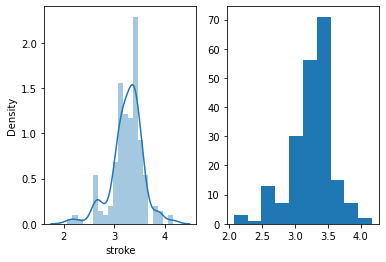

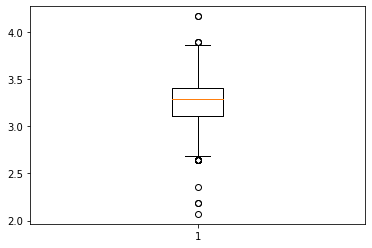

Số lượng outliers:  20
Tỉ lệ outliers so với mẫu 0.0975609756097561


<IPython.core.display.Javascript object>

In [54]:
# stroke
m3 = df["stroke"].mean()
df["stroke"].fillna(m3, inplace=True)

continuous_univariate_analysis(df["stroke"])
visualize_histogram(df["stroke"])
visualize_boxplot(df["stroke"])
find_outliers(df["stroke"])

1\ Describe: 
 count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression-ratio, dtype: float64 

2\ Meadian:  9.0
3\ Mode:  <bound method Series.mode of 0       9.0
1       9.0
2       9.0
3      10.0
4       8.0
       ... 
200     9.5
201     8.7
202     8.8
203    23.0
204     9.5
Name: compression-ratio, Length: 205, dtype: float64>
4\ Range:  16.0
5\ Variance:  15.777104318507893
6\ Số NaN:  0
7\ 	Q1 =  8.6
   	Q3 =  9.4
   	IQR =  0.8000000000000007
8\ Skew:  2.6108624576151533
Phân phối lệch phải
9\ Kurtosis:  5.233054347604856
Phân phối nhọn hơn pp chuẩn


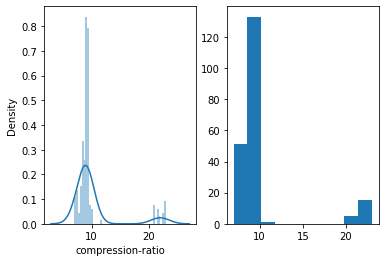

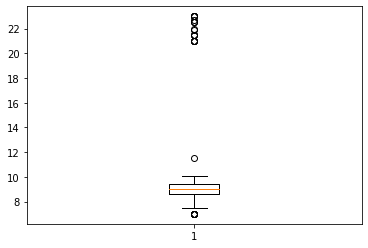

Số lượng outliers:  28
Tỉ lệ outliers so với mẫu 0.13658536585365855


<IPython.core.display.Javascript object>

In [55]:
# width
continuous_univariate_analysis(df["compression-ratio"])
visualize_histogram(df["compression-ratio"])
visualize_boxplot(df["compression-ratio"])
find_outliers(df["compression-ratio"])

### horsepower

1\ Describe: 
 count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64 

2\ Meadian:  95.0
3\ Mode:  <bound method Series.mode of 0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64>
4\ Range:  nan
5\ Variance:  1577.2310881334438
6\ Số NaN:  2
7\ 	Q1 =  nan
   	Q3 =  nan
   	IQR =  nan
8\ Skew:  1.3910294937929355
Phân phối lệch phải
9\ Kurtosis:  2.6232797942177686
Phân phối nhọn hơn pp chuẩn


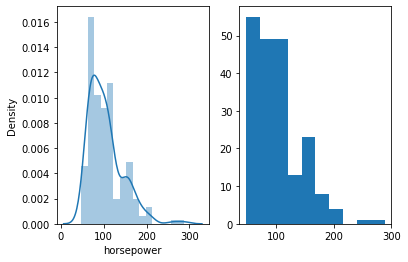

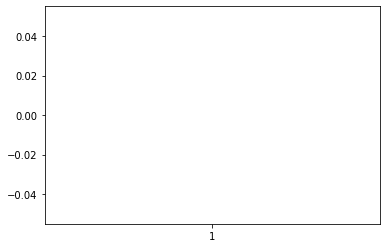

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [56]:
# horsepower
continuous_univariate_analysis(df["horsepower"])
visualize_histogram(df["horsepower"])
visualize_boxplot(df["horsepower"])
find_outliers(df["horsepower"])

In [109]:
"""
vì horsepower có NaN nên ko thể xem dc outliers
ta thử thay thế bằng mean để xem outliers
"""

'\nvì horsepower có NaN nên ko thể xem dc outliers\nta thử thay thế bằng mean để xem outliers\n'

<IPython.core.display.Javascript object>

1\ Describe: 
 count    205.000000
mean     104.256158
std       39.519211
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64 

2\ Meadian:  95.0
3\ Mode:  <bound method Series.mode of 0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64>
4\ Range:  240.0
5\ Variance:  1561.7680382497826
6\ Số NaN:  0
7\ 	Q1 =  70.0
   	Q3 =  116.0
   	IQR =  46.0
8\ Skew:  1.3977631283295846
Phân phối lệch phải
9\ Kurtosis:  2.678182248336632
Phân phối nhọn hơn pp chuẩn


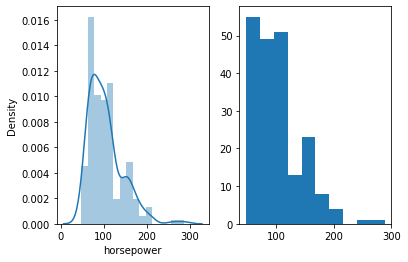

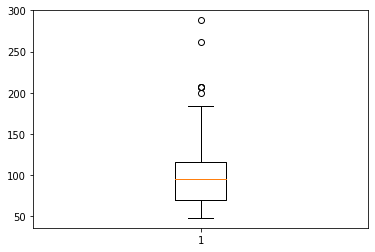

Số lượng outliers:  6
Tỉ lệ outliers so với mẫu 0.02926829268292683


<IPython.core.display.Javascript object>

In [59]:
# horsepower
m4 = df["horsepower"].mean()
df["horsepower"].fillna(m4, inplace=True)

continuous_univariate_analysis(df["horsepower"])
visualize_histogram(df["horsepower"])
visualize_boxplot(df["horsepower"])
find_outliers(df["horsepower"])

### peak-rpm

1\ Describe: 
 count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64 

2\ Meadian:  5200.0
3\ Mode:  <bound method Series.mode of 0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64>
4\ Range:  nan
5\ Variance:  229761.62025069498
6\ Số NaN:  2
7\ 	Q1 =  nan
   	Q3 =  nan
   	IQR =  nan
8\ Skew:  0.07323669149378209
Phân phối lệch phải
9\ Kurtosis:  0.056526492158017305
Phân phối nhọn hơn pp chuẩn


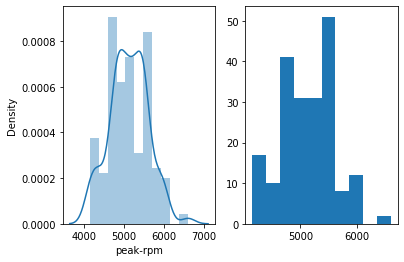

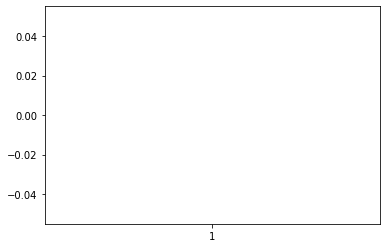

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [60]:
# peak-rpm
continuous_univariate_analysis(df["peak-rpm"])
visualize_histogram(df["peak-rpm"])
visualize_boxplot(df["peak-rpm"])
find_outliers(df["peak-rpm"])

In [113]:
"""
vì peak-rpm có NaN nên ko thể xem dc outliers
ta thử thay bằng mean để xem outliers
"""

'\nvì peak-rpm có NaN nên ko thể xem dc outliers\nta thử thay bằng mean để xem outliers\n'

<IPython.core.display.Javascript object>

1\ Describe: 
 count     205.000000
mean     5125.369458
std       476.979093
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64 

2\ Meadian:  5200.0
3\ Mode:  <bound method Series.mode of 0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64>
4\ Range:  2450.0
5\ Variance:  227509.05534627638
6\ Số NaN:  0
7\ 	Q1 =  4800.0
   	Q3 =  5500.0
   	IQR =  700.0
8\ Skew:  0.07359121245641652
Phân phối lệch phải
9\ Kurtosis:  0.0867703457300757
Phân phối nhọn hơn pp chuẩn


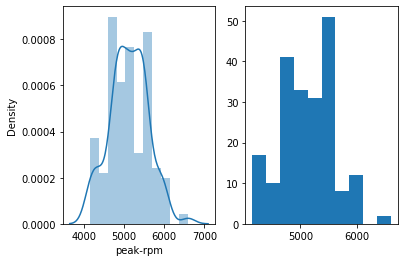

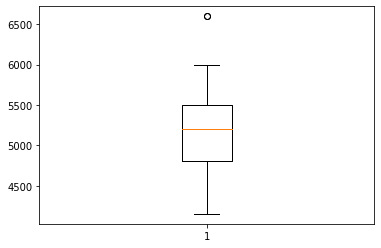

Số lượng outliers:  2
Tỉ lệ outliers so với mẫu 0.00975609756097561


<IPython.core.display.Javascript object>

In [61]:
# peak-rpm
m5 = df["peak-rpm"].mean()
df["peak-rpm"].fillna(m5, inplace=True)

continuous_univariate_analysis(df["peak-rpm"])
visualize_histogram(df["peak-rpm"])
visualize_boxplot(df["peak-rpm"])
find_outliers(df["peak-rpm"])

### city-mpg

1\ Describe: 
 count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64 

2\ Meadian:  24.0
3\ Mode:  <bound method Series.mode of 0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64>
4\ Range:  36
5\ Variance:  42.79961740793879
6\ Số NaN:  0
7\ 	Q1 =  19.0
   	Q3 =  30.0
   	IQR =  11.0
8\ Skew:  0.6637040288148164
Phân phối lệch phải
9\ Kurtosis:  0.5786483404849747
Phân phối nhọn hơn pp chuẩn


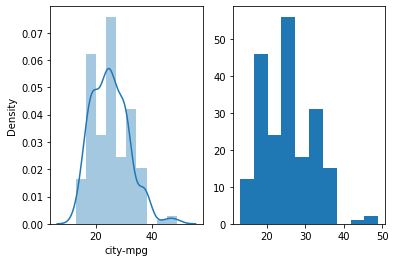

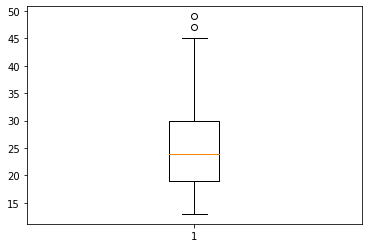

Số lượng outliers:  2
Tỉ lệ outliers so với mẫu 0.00975609756097561


<IPython.core.display.Javascript object>

In [62]:
# city-mpg
continuous_univariate_analysis(df["city-mpg"])
visualize_histogram(df["city-mpg"])
visualize_boxplot(df["city-mpg"])
find_outliers(df["city-mpg"])

In [308]:
"""
city-mpg ko có NaN
"""

'\ncity-mpg ko có NaN\n'

<IPython.core.display.Javascript object>

### highway-mpg

1\ Describe: 
 count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64 

2\ Meadian:  30.0
3\ Mode:  <bound method Series.mode of 0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64>
4\ Range:  38
5\ Variance:  47.42309899569584
6\ Số NaN:  0
7\ 	Q1 =  25.0
   	Q3 =  34.0
   	IQR =  9.0
8\ Skew:  0.5399971878746754
Phân phối lệch phải
9\ Kurtosis:  0.44007038152989786
Phân phối nhọn hơn pp chuẩn


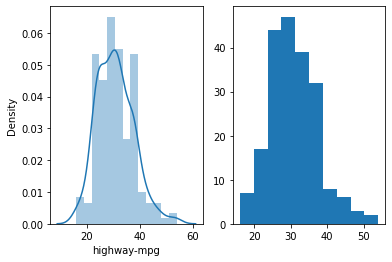

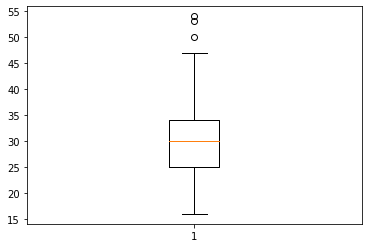

Số lượng outliers:  3
Tỉ lệ outliers so với mẫu 0.014634146341463415


<IPython.core.display.Javascript object>

In [63]:
# highway-mpg
continuous_univariate_analysis(df["highway-mpg"])
visualize_histogram(df["highway-mpg"])
visualize_boxplot(df["highway-mpg"])
find_outliers(df["highway-mpg"])

In [311]:
"""
highway-mpg ko có NaN
phạm vị giá trị là ko gian dương
"""

'\nhighway-mpg ko có NaN\nphạm vị giá trị là ko gian dương\n'

<IPython.core.display.Javascript object>

### price (target)

1\ Describe: 
 count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64 

2\ Meadian:  10295.0
3\ Mode:  <bound method Series.mode of 0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64>
4\ Range:  nan
5\ Variance:  63155863.44318408
6\ Số NaN:  4
7\ 	Q1 =  nan
   	Q3 =  nan
   	IQR =  nan
8\ Skew:  1.8096753390980749
Phân phối lệch phải
9\ Kurtosis:  3.2315368868295193
Phân phối nhọn hơn pp chuẩn


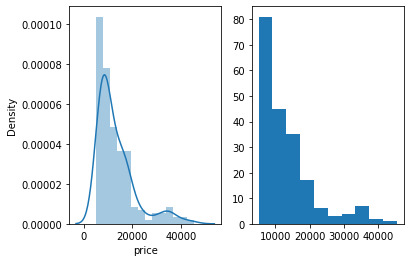

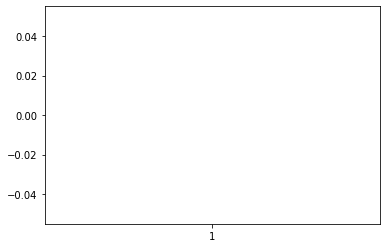

Số lượng outliers:  0
Tỉ lệ outliers so với mẫu 0.0


<IPython.core.display.Javascript object>

In [64]:
# highway-mpg
continuous_univariate_analysis(df["price"])
visualize_histogram(df["price"])
visualize_boxplot(df["price"])
find_outliers(df["price"])

In [117]:
'''
price có NaN, vì price là biến target nên ta sẽ drop nó đi (vì đó là nhưng dữ liệu ko có ích)
'''


'\nprice có NaN, vì price là biến target nên ta sẽ drop nó đi (vì đó là nhưng dữ liệu ko có ích)\n'

<IPython.core.display.Javascript object>

In [89]:
df = df.dropna(subset=["price"])

<IPython.core.display.Javascript object>

In [143]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<IPython.core.display.Javascript object>

### Categorical Variable

In [93]:
def categorical_univariate_variable(f):
    print("1\ Mật độ phân phối: \n", f.value_counts())
    print("2\ Số giá trị NaN: \n", f.isnull().sum())
    print('\n\n3\ Tỉ lệ mật độ phân phối:\n', f.value_counts()/len(f))
    f.value_counts().plot.bar()
    plt.show()


<IPython.core.display.Javascript object>

### make

1\ Mật độ phân phối: 
 toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 toyota           0.159204
nissan           0.089552
mazda            0.084577
mitsubishi       0.064677
honda            0.064677
volkswagen       0.059701
subaru           0.059701
peugot           0.054726
volvo            0.054726
dodge            0.044776
mercedes-benz    0.039801
bmw              0.039801
plymouth         0.034826
audi             0.029851
saab             0.029851
porsche          0.019900
jaguar           0.014925
chevrolet        

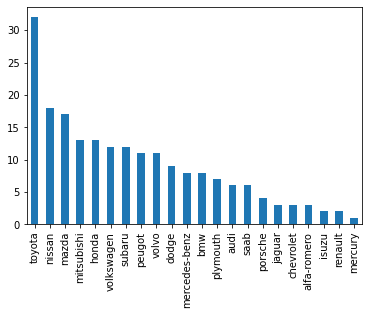

<IPython.core.display.Javascript object>

In [144]:
# make
categorical_univariate_variable(df.make)

In [95]:
"""
make là biến nominal (ko theo thứ tự)
"""

'\nmake là biến nominal (ko theo thứ tự)\n'

<IPython.core.display.Javascript object>

### fuel-type

1\ Mật độ phân phối: 
 gas       181
diesel     20
Name: fuel-type, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 gas       0.900498
diesel    0.099502
Name: fuel-type, dtype: float64


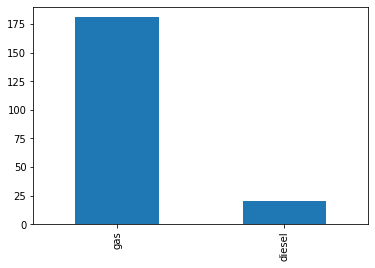

<IPython.core.display.Javascript object>

In [145]:
# fuel-type
categorical_univariate_variable(df["fuel-type"])

In [147]:
"""
fuel-type chỉ có 2 giá trị, là nominal
"""

'\nfuel-type chỉ có 2 giá trị, là nominal\n'

<IPython.core.display.Javascript object>

### aspiration

1\ Mật độ phân phối: 
 std      165
turbo     36
Name: aspiration, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 std      0.820896
turbo    0.179104
Name: aspiration, dtype: float64


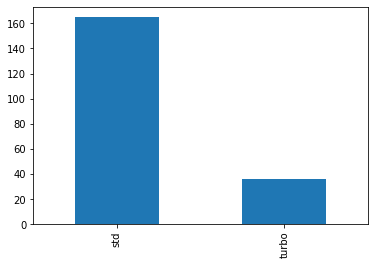

<IPython.core.display.Javascript object>

In [150]:
# aspiration
categorical_univariate_variable(df["aspiration"])

In [149]:
"""
aspiration chỉ có 2 giá trị, là nominal
"""

'\naspiration chỉ có 2 giá trị, là nominal\n'

<IPython.core.display.Javascript object>

### num-of-doors

1\ Mật độ phân phối: 
 four    113
two      86
Name: num-of-doors, dtype: int64
2\ Số giá trị NaN: 
 2


3\ Tỉ lệ mật độ phân phối:
 four    0.562189
two     0.427861
Name: num-of-doors, dtype: float64


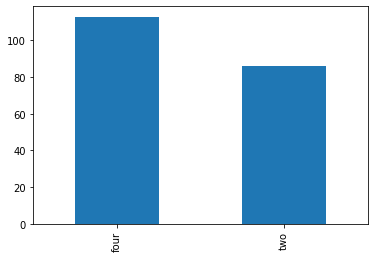

<IPython.core.display.Javascript object>

In [151]:
# num-of-doors
categorical_univariate_variable(df["num-of-doors"])

In [101]:
"""
num-of-doors có 2 giá trị và là ordinal (có thứ tự)
có 2 NaN

=> ta thay thế các giá trị NaN này bằng mode
"""

'\nnum-of-doors có 2 giá trị và là ordinal (có thứ tự)\ncó 2 NaN\n'

<IPython.core.display.Javascript object>

In [152]:
df["num-of-doors"] = df["num-of-doors"].fillna(df["num-of-doors"].mode()[0])


<IPython.core.display.Javascript object>

In [153]:
df["num-of-doors"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [159]:
"""
=> sau khi thay thế, num-of-doors có 2 giá trị, là ordinal
"""

'\n=> sau khi thay thế, num-of-doors có 2 giá trị, là ordinal\n'

<IPython.core.display.Javascript object>

### body-style

1\ Mật độ phân phối: 
 sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 sedan          0.467662
hatchback      0.338308
wagon          0.124378
hardtop        0.039801
convertible    0.029851
Name: body-style, dtype: float64


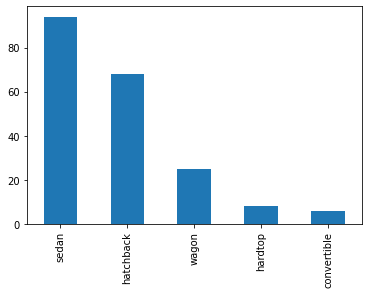

<IPython.core.display.Javascript object>

In [155]:
# body-style
categorical_univariate_variable(df["body-style"])

In [158]:
# body-style có 5 giá trị, là nominal, ko có NaN

<IPython.core.display.Javascript object>

### fuel-type

1\ Mật độ phân phối: 
 gas       181
diesel     20
Name: fuel-type, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 gas       0.900498
diesel    0.099502
Name: fuel-type, dtype: float64


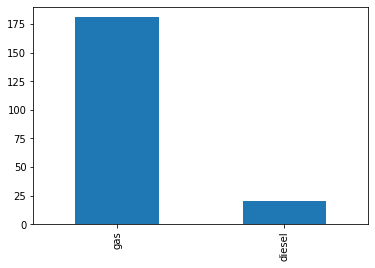

<IPython.core.display.Javascript object>

In [156]:
# fuel-type
categorical_univariate_variable(df["fuel-type"])

In [ ]:
'''
fuel-type có 2 giá trị duy nhất, là nominal
'''

### drive-wheels

1\ Mật độ phân phối: 
 fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 fwd    0.587065
rwd    0.373134
4wd    0.039801
Name: drive-wheels, dtype: float64


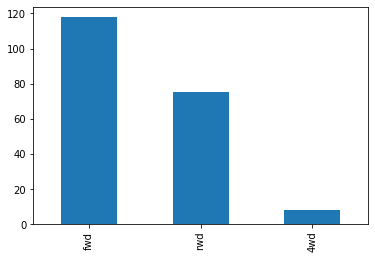

<IPython.core.display.Javascript object>

In [166]:
# drive-wheels
categorical_univariate_variable(df["drive-wheels"])

In [161]:
"""
drive-wheels có 3 giá trị duy nhất, ko có nan, là nominal
"""

'\ndrive-wheels có 3 giá trị duy nhất, ko có nan, là nominal\n'

<IPython.core.display.Javascript object>

### engine-location

1\ Mật độ phân phối: 
 front    198
rear       3
Name: engine-location, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 front    0.985075
rear     0.014925
Name: engine-location, dtype: float64


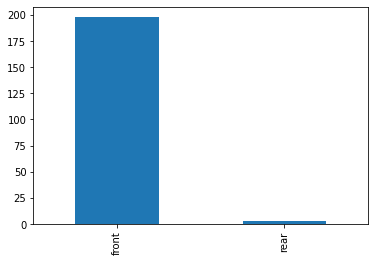

<IPython.core.display.Javascript object>

In [165]:
# engine-location
categorical_univariate_variable(df["engine-location"])

In [362]:
"""
engine-location có 2 giá trị duy nhất, ko có NaN, 'rear' chiếm tỉ lệ rất nhỏ so với front
"""

"\nengine-location có 2 giá trị duy nhất, ko có NaN, 'rear' chiếm tỉ lệ rất nhỏ so với front\n"

<IPython.core.display.Javascript object>

### engine-type

1\ Mật độ phân phối: 
 ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 ohc      0.721393
ohcf     0.074627
ohcv     0.064677
dohc     0.059701
l        0.059701
rotor    0.019900
Name: engine-type, dtype: float64


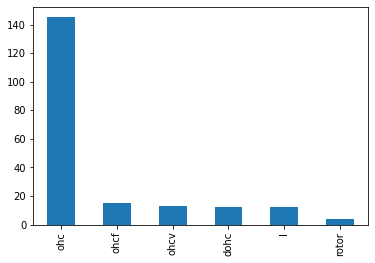

<IPython.core.display.Javascript object>

In [164]:
# engine-type
categorical_univariate_variable(df["engine-type"])

In [108]:
"""
engine-type có 7 giá trị duy nhất, là nominal, 'ohc' chiếm tỉ lệ chủ yếu, dohcv chiếm tỉ lệ rất nhỏ
"""

"\nengine-type có 7 giá trị duy nhất, là nominal, 'ohc' chiếm tỉ lệ chủ yếu, dohcv chiếm tỉ lệ rất nhỏ\n"

<IPython.core.display.Javascript object>

1\ Mật độ phân phối: 
 four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 four      0.781095
six       0.119403
five      0.049751
two       0.019900
eight     0.019900
three     0.004975
twelve    0.004975
Name: num-of-cylinders, dtype: float64


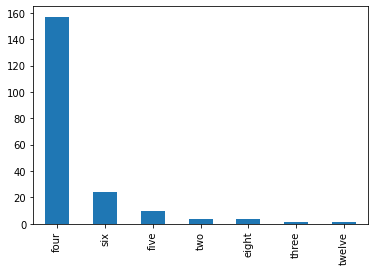

<IPython.core.display.Javascript object>

In [109]:
categorical_univariate_variable(df_predict["num-of-cylinders"])

In [111]:
"""
num-of-cylinders là ordinal, three và twelve chiếm tỉ lệ rất nhỏ
"""

'\nnum-of-cylinders là ordinal, three và twelve chiếm tỉ lệ rất nhỏ\n'

<IPython.core.display.Javascript object>

### fuel-system

1\ Mật độ phân phối: 
 mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 mpfi    0.457711
2bbl    0.318408
idi     0.099502
1bbl    0.054726
spdi    0.044776
4bbl    0.014925
mfi     0.004975
spfi    0.004975
Name: fuel-system, dtype: float64


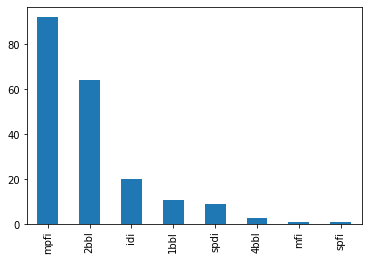

<IPython.core.display.Javascript object>

In [167]:
# fuel-system
categorical_univariate_variable(df["fuel-system"])

In [113]:
"""
fuel-system là nominal, mfi và spfi chiếm tỉ lệ rất nhỏ
"""

'\nfuel-system là nominal, mfi và spfi chiếm tỉ lệ rất nhỏ\n'

<IPython.core.display.Javascript object>

### symboling

1\ Mật độ phân phối: 
  0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
  0    0.323383
 1    0.258706
 2    0.159204
 3    0.134328
-1    0.109453
-2    0.014925
Name: symboling, dtype: float64


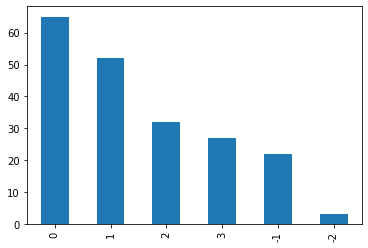

<IPython.core.display.Javascript object>

In [168]:
# symboling
categorical_univariate_variable(df["symboling"])

---
---

In [ ]:
"""
Sau khi phân tích tất cả các biến, t thấy:
    "normalized-losses": 41 missing data
    "num-of-doors": 2 missing data
    "bore": 4 missing data
    "stroke" : 4 missing data
    "horsepower": 2 missing data
    "peak-rpm": 2 missing data
    "price": 4 missing data
    
    và đã xử lý các giá trị null này
"""



---
---

### Phân tích 2 biến

### Continuous - Continuous

In [217]:
df_corr = df.corr()
df_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


<IPython.core.display.Javascript object>

In [218]:
# các feature có tương quan với biến target (price)
# nếu abs(df.price.corr()) > 0.3 thì là có tương quan

feature_1 = df_corr.price[(df_corr["price"] > 0.3) | (df_corr["price"] < -0.3)].index
feature_1

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
"""
vậy: 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg' là các feature có tương quan đến price (target)
"""

### Phân tích các biến predict

In [212]:
df_con_con = df_predict[
    [
        "wheel-base",
        "length",
        "width",
        "curb-weight",
        "engine-size",
        "bore",
        "horsepower",
        "city-mpg",
        "highway-mpg",
    ]
]

<IPython.core.display.Javascript object>

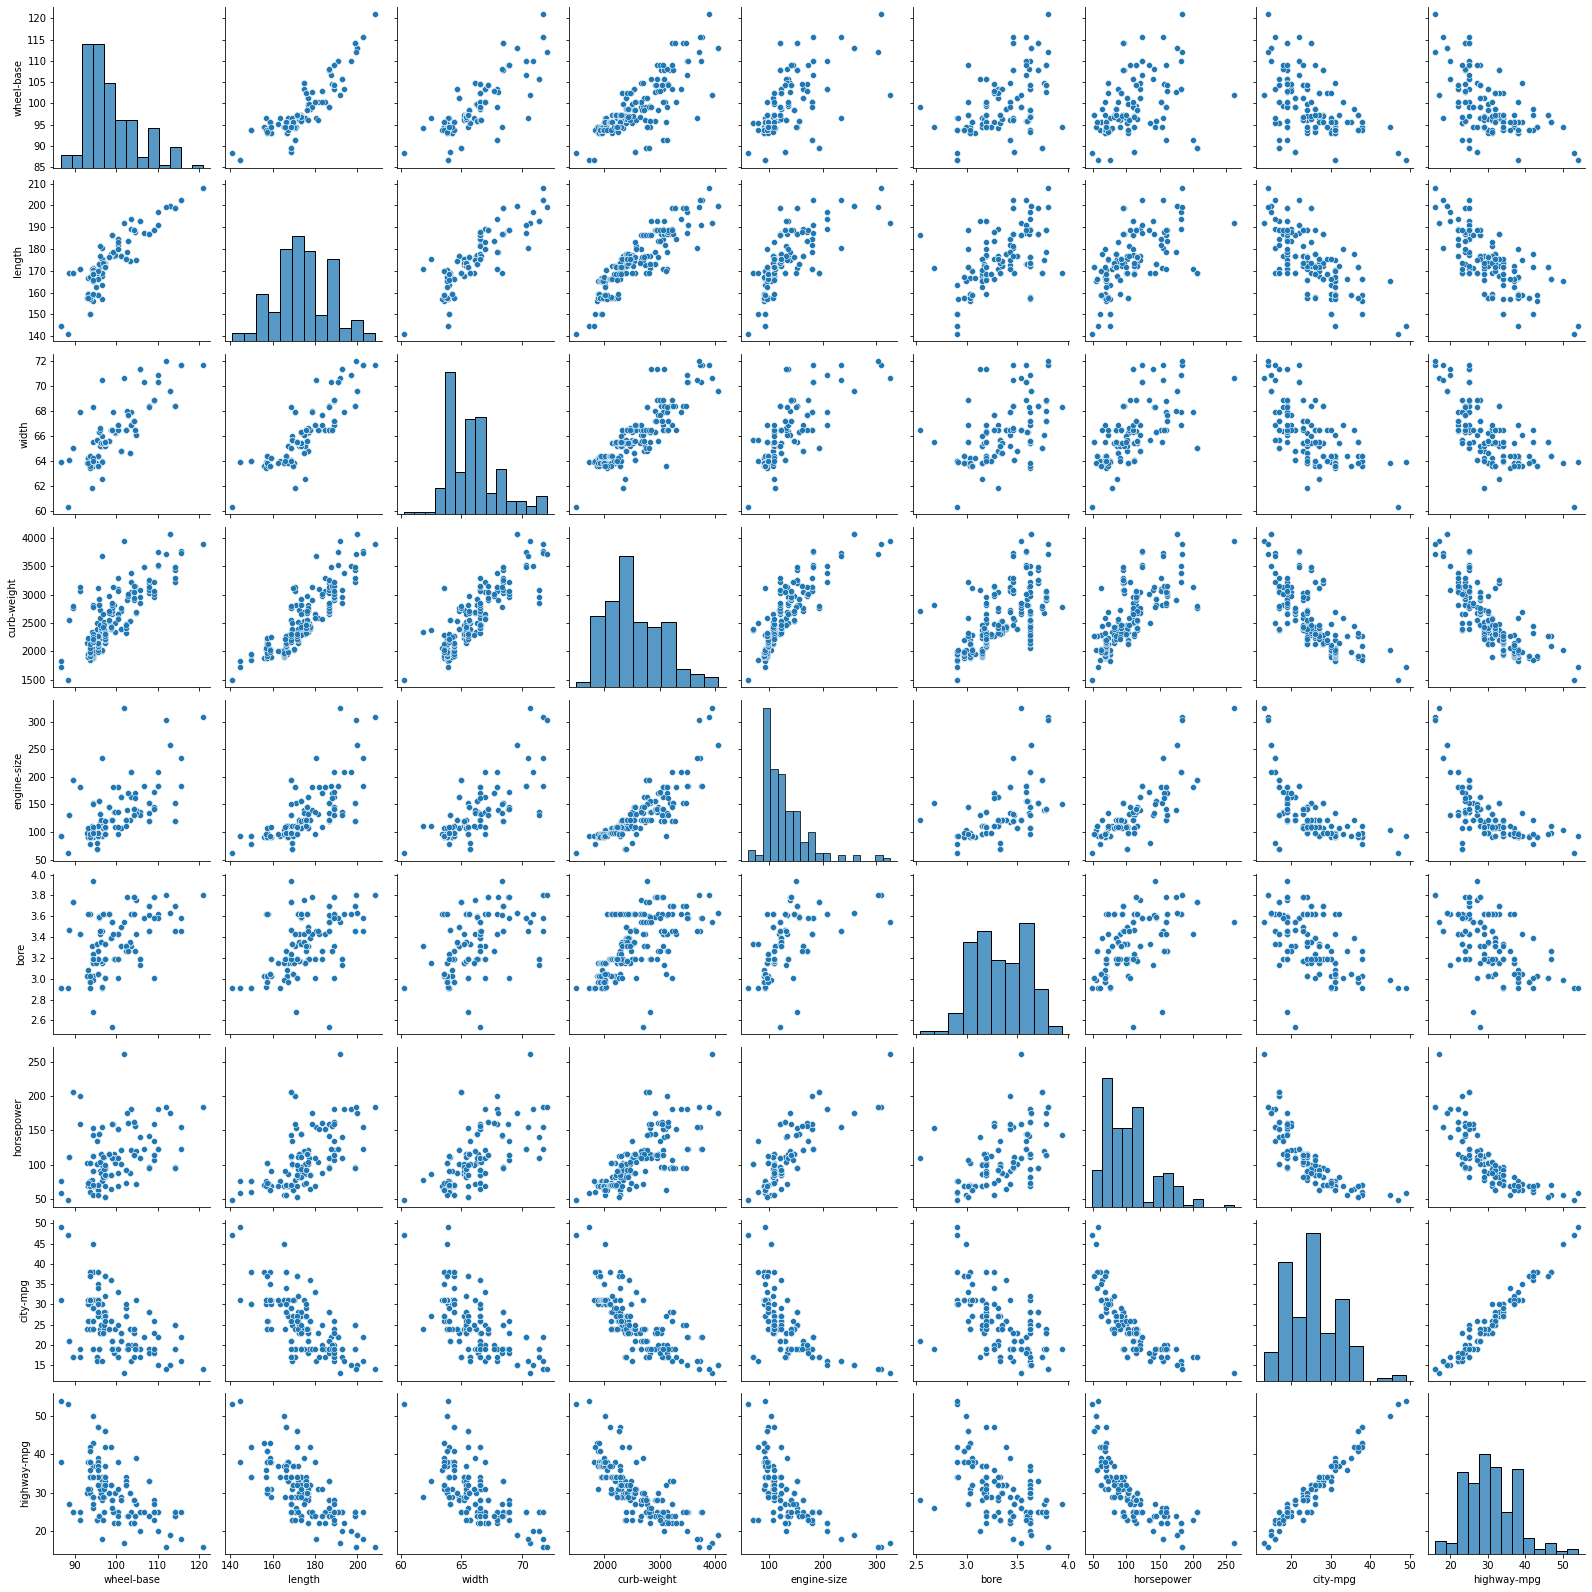

<IPython.core.display.Javascript object>

In [213]:
# Visualisation
sns.pairplot(df_con_con)
plt.show()

In [223]:
df_corr1 = df_con_con.corr()
df_corr1

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
wheel-base,1.000000,0.876024,0.814507,0.782097,0.572027,0.493244,0.371147,-0.470606,-0.543304
length,0.876024,1.000000,0.857170,0.880665,0.685025,0.608971,0.579821,-0.665192,-0.698142
width,0.814507,0.857170,1.000000,0.866201,0.729436,0.544885,0.615077,-0.633531,-0.680635
curb-weight,0.782097,0.880665,0.866201,1.000000,0.849072,0.644060,0.757976,-0.749543,-0.794889
engine-size,0.572027,0.685025,0.729436,0.849072,1.000000,0.572609,0.822676,-0.650546,-0.679571
bore,0.493244,0.608971,0.544885,0.644060,0.572609,1.000000,0.566936,-0.582027,-0.591309
horsepower,0.371147,0.579821,0.615077,0.757976,0.822676,0.566936,1.000000,-0.822214,-0.804575
city-mpg,-0.470606,-0.665192,-0.633531,-0.749543,-0.650546,-0.582027,-0.822214,1.000000,0.972044
highway-mpg,-0.543304,-0.698142,-0.680635,-0.794889,-0.679571,-0.591309,-0.804575,0.972044,1.000000


<IPython.core.display.Javascript object>

### Categorical & Continuous

In [ ]:
    make, 
    fuel-type, 
    aspiration, 
    num-of-doors, 
    body-style, 
    drive-wheels, 
    engine-location, 
    engine-type, 
    num-of-cylinders, 
    fuel-system,
    symboling